In [84]:
# matplotlib rebuild
import matplotlib as mpl
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000


## 데이터 가져오기

### DX pandas core ndarray dataframe 형태

In [114]:
dx = 'DX-Y.NYB'
# commodity_symbol = "GC=F"  # Gold symbol
start_date = "2010-01-01"
end_date = "2023-06-27"
data_dx = yf.download(dx, start=start_date, end=end_date)['Close']
print(data_dx.tail(10))

[*********************100%***********************]  1 of 1 completed
Date
2023-06-12    103.629997
2023-06-13    103.339996
2023-06-14    103.010002
2023-06-15    102.120003
2023-06-16    102.300003
2023-06-20    102.540001
2023-06-21    102.070000
2023-06-22    102.389999
2023-06-23    102.900002
2023-06-26    102.690002
Name: Close, dtype: float64


### Commodity pandas core ndaaray dataframe 형태

In [86]:
Com_list = ['GC=F','SI=F','CL=F','BZ=F','NG=F','HG=F','ZC=F','ZW=F']
start_date = "2010-01-01"
end_date = "2023-06-27"

for com in Com_list:
    data_com = yf.download(Com_list, start=start_date, end=end_date)['Close']
print(data_com)

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
                 BZ=F       CL=F         GC=F    HG=F   NG=F       SI=F  \
Date                                                                      
2010-01-04  80.120003  81.510002  1117.699951  3.3880  5.884  17.440001   
2010-01-05  80.589996  81.769997  1118.099976  3.3960  5.637  17.781000   
2010-01-06  81.889999  83.180000  1135.900024  3.4775  6.009  18.163000   
2010-01-07  81.510002  82.660004  1133.099976  3.4115  5.806  18.333000  

### 개별 pandas core ndarray dataframe 병합

In [116]:
df_list = [data_com, data_dx]
merged_df = pd.concat(df_list, axis=1)
merged_df

,BZ=F,CL=F,GC=F,HG=F,NG=F,SI=F,ZC=F,ZW=F,Close
Date,,,,,,,,,
2010-01-04,80.120003,81.510002,1117.699951,3.3880,5.884,17.440001,418.50,557.75,77.529999
2010-01-05,80.589996,81.769997,1118.099976,3.3960,5.637,17.781000,418.75,553.00,77.620003
2010-01-06,81.889999,83.180000,1135.900024,3.4775,6.009,18.163000,421.75,567.25,77.489998
2010-01-07,81.510002,82.660004,1133.099976,3.4115,5.806,18.333000,417.50,557.75,77.910004
2010-01-08,81.370003,82.750000,1138.199951,3.3880,5.749,18.458000,423.00,568.50,77.470001
...,...,...,...,...,...,...,...,...,...
2023-06-20,75.900002,70.500000,1935.500000,3.8785,2.492,23.193001,643.75,695.75,102.540001
2023-06-21,77.120003,72.529999,1933.300049,3.9110,2.597,22.774000,671.00,734.50,102.070000
2023-06-22,74.139999,69.510002,1912.699951,3.8885,2.608,22.436001,660.50,739.00,102.389999


## 데이터 시각화

<Axes: xlabel='Date'>

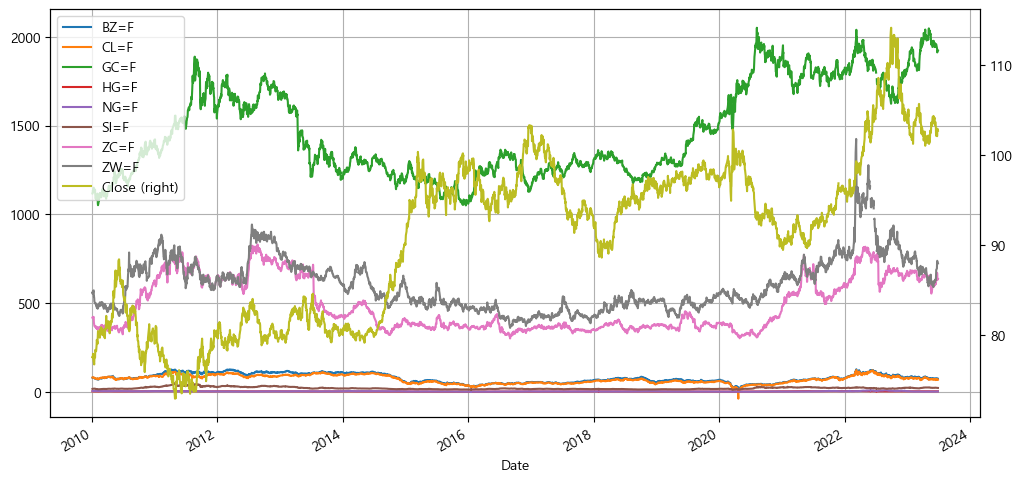

In [117]:
merged_df.plot(secondary_y=['Close'])

## 비교를 위해 데이터 정규화
- 전체 데이터를 첫번째 row로 나누고 -1.0

In [118]:
# df2 = df[['LG화학', '삼성전자']]

# df_plot = df2 / df2.iloc[0] - 1.0
# df_plot.plot()

## 여러 종목 정규화 및 비교 차트

<Axes: xlabel='Date'>

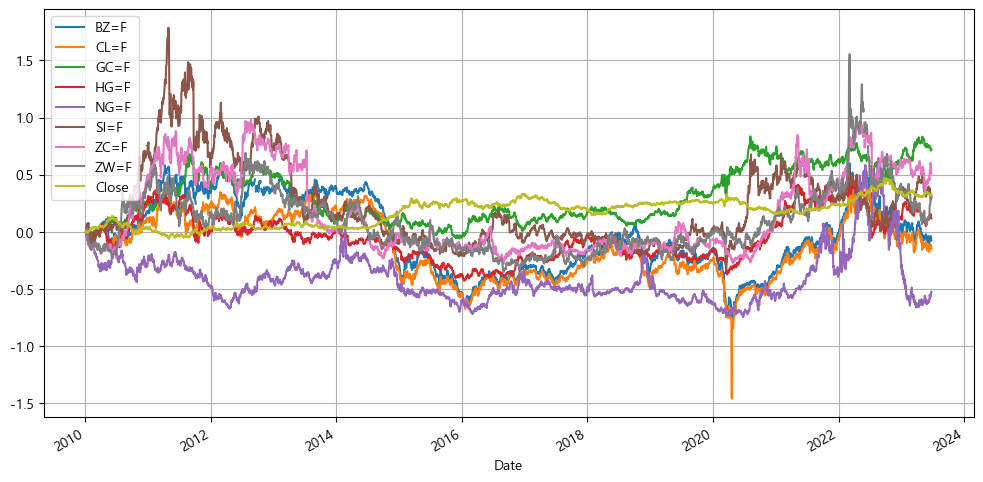

In [119]:
merged_df_norm = merged_df / merged_df.iloc[0] - 1
merged_df_norm.plot()

In [120]:
merged_df_norm.iloc[-1].sort_values(ascending=False)

GC=F     0.721124
ZC=F     0.522700
Close    0.324520
SI=F     0.307626
ZW=F     0.298521
HG=F     0.117621
BZ=F    -0.074139
CL=F    -0.148939
NG=F    -0.525663
Name: 2023-06-26 00:00:00, dtype: float64

## 회귀분석 하기
### DX/TNX,TYX
- 상관관계를 분석해서 업종 지수에 대한 비교 및 특정 종목이 따라가지 못 하는 경우 내.외부 요인 판단 가능

In [121]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np
from sklearn.impute import SimpleImputer

In [122]:
X = merged_df.iloc[:,np.ravel(4)].values # CL
y = merged_df.iloc[:,np.ravel(-1)].values # DX
X,y
# len(X), len(y)

(array([[5.88399982],
        [5.63700008],
        [6.00899982],
        ...,
        [2.60800004],
        [2.72900009],
        [2.79099989]]),
 array([[ 77.52999878],
        [ 77.62000275],
        [ 77.48999786],
        ...,
        [102.38999939],
        [102.90000153],
        [102.69000244]]))

In [123]:
y.shape, X.shape

((3396, 1), (3396, 1))

In [124]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y)

In [125]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

LinearRegression()

In [126]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([[90.26037105],
       [90.32267471],
       [90.22884082],
       ...,
       [91.08671519],
       [91.05619391],
       [91.04055497]])

In [127]:
X.shape, y.shape

((3396, 1), (3396, 1))

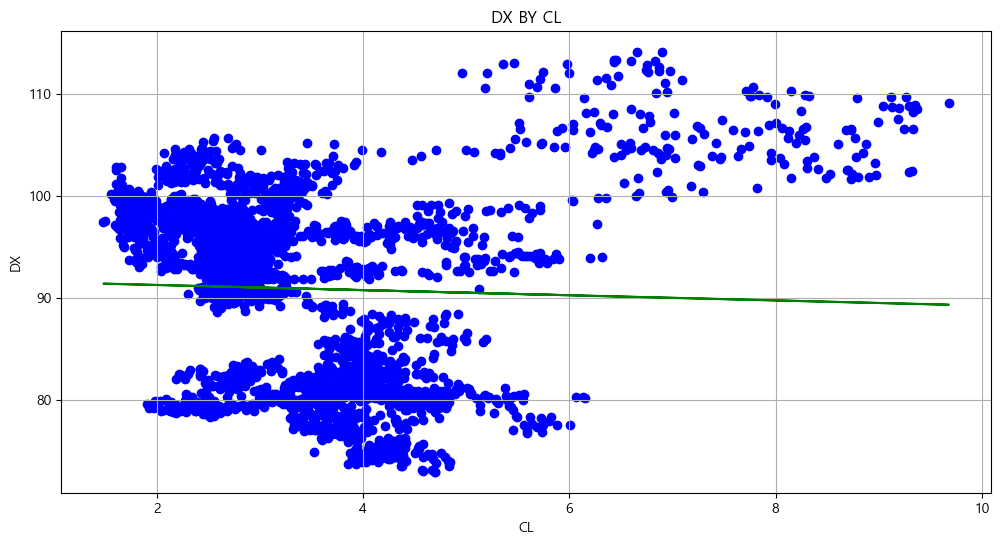

In [128]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('DX BY CL')
plt.xlabel('CL')
plt.ylabel('DX')
plt.show()

In [129]:
print('SOXL에 따른 TNX 예측 값 :', reg.predict([[4]]))
# print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

SOXL에 따른 TNX 예측 값 : [[90.73559459]]


In [130]:
reg.coef_, reg.intercept_

(array([[-0.25224182]]), array([91.74456186]))

## 데이터 세트 분리

In [131]:
from sklearn.model_selection import train_test_split  # 데이터 분리는 sklearn.moder_selection 이고 리니어는 sklearn.linear_modeol import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  # 테스트 사이즈를 8:2로 하겠다 test_size = 0.2 random_state = 0 은 그냥 확인용

In [132]:
len(X_train), len(X_test)

(2716, 680)

In [133]:
len(y_train), len(y_test)

(2716, 680)

### 분리된 데이터를 통해 모델링

In [134]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

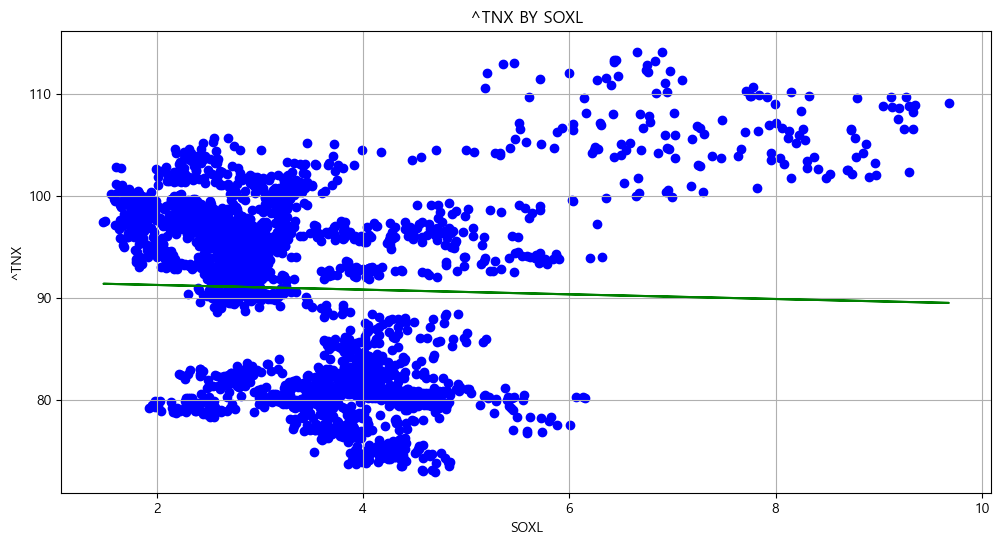

In [135]:
plt.scatter(X_train,y_train, color='blue') # 산점도 그래프 -> 실제 값?
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프  -> 예측 값?
plt.title('^TNX BY SOXL')
plt.xlabel('SOXL')
plt.ylabel('^TNX')
plt.show()

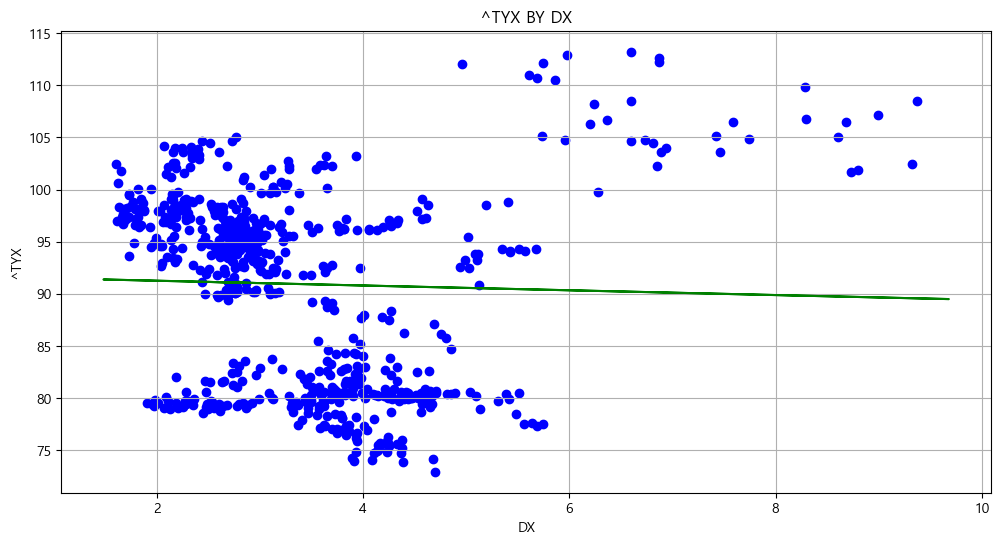

In [136]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 
plt.title('^TYX BY DX')
plt.xlabel('DX')
plt.ylabel('^TYX')
plt.show()

In [137]:
reg.coef_, reg.intercept_

(array([[-0.22928027]]), array([91.71094027]))

### 모델평가

In [138]:
reg.score(X_train, y_train)

0.0011129952138453358

In [139]:
reg.score(X_test, y_test)

0.0015259947493905246

### 경사하강법

In [ ]:
from sklearn.linear_model import SGDRegressor # SGF 확률적 경사하강법 
#지수 표기법
#1e-3 = 0.001 10^-3
#1e-4 = 0.0001 10^-4
#1e+3 = 1000 10^3
#1e+4 = 10000 10^4


# sr = SGDRegressor()
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)  #에포크 방식
sr.fit(X_train, y_train)

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프 
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델평가

In [ ]:
sr.score(X_train, y_train) # 룬련 세트를 통한 모델평가

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

data = yf.download(commodity_symbol, start=start_date, end=end_date)
print(data.tail(10))